##### Find cars on an image

In [1]:
import numpy as np
import pickle
import cv2
import glob
import time
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
from moviepy.editor import VideoFileClip
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.ndimage.measurements import label

##### Data collection

In [2]:
car_images = glob.glob('./training_data/vehicles/*/*/*.png')
noncar_images = glob.glob('./training_data/non_vehicles/*/*/*.png')

##### Set hog parameters, result of hog parameter exploration step

In [3]:
hog_params = {}
hog_params['cspace'] = 'YUV'
hog_params['orient'] = 10
hog_params['pix_per_cell'] = 16
hog_params['cell_per_block'] = 2
hog_params['hog_channel'] = "ALL"

##### Train using SVC after getting hog features

In [4]:
from vehicle_detection import classifier
g_svc, hog_svc_data = classifier.train_hog_features(car_images, noncar_images, hog_params)

60.41 Seconds to extract HOG features...
Using: 10 orientations 16 pixels per cell and 2 cells per block
Feature vector length: 1080
1.11 Seconds to train SVC...
Test Accuracy of SVC =  0.9834
My SVC predicts:  [ 0.  0.  0.  0.  0.  0.  1.  0.  1.  1.]
For these 10 labels:  [ 0.  0.  0.  0.  0.  0.  1.  0.  1.  1.]
0.024 Seconds to predict 10 labels with SVC


##### Begin sliding window search

In [5]:
from vehicle_detection import sliding_window

##### Set parameters for window, a set of choice and try on an image

In [6]:
g_ystart = 400
g_ystop = 656
g_scale = 1.5

g_colorspace = hog_params['cspace']
g_hog_channel = hog_params['hog_channel']
g_orient = hog_params['orient']
g_pix_per_cell = hog_params['pix_per_cell']
g_cell_per_block = hog_params['cell_per_block']

(720, 1280, 3)

8 rectangles found in image


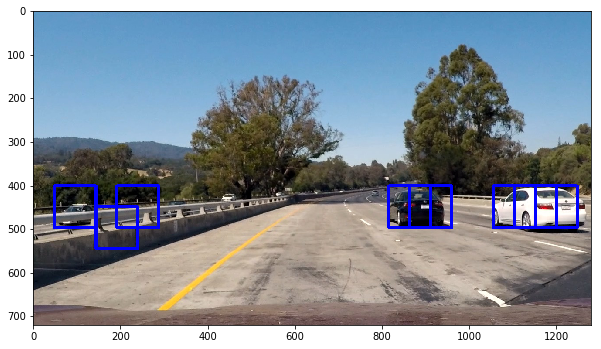

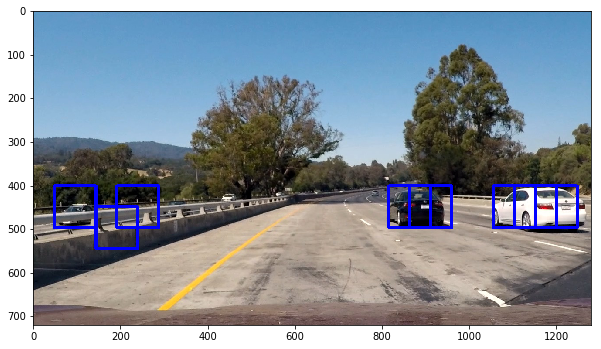

In [9]:
img = cv2.imread('./test_images/test1.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

display(img.shape)
car_windows = sliding_window.detect_cars(img, g_ystart, g_ystop, g_scale, g_svc, g_colorspace, g_hog_channel, 
                          g_orient, g_pix_per_cell, g_cell_per_block)

print(len(car_windows), 'rectangles found in image')
car_detected_img = sliding_window.draw_boxes(img, car_windows)
plt.figure(figsize=(10,10))
plt.imshow(car_detected_img)
plt.show()

##### Function to perform an exhaustive search, I have chosen the coorodinates and scaling by manual observation of ares that will have cars

In [8]:
ystart = [400, 425]
ystop = [450, 500, 550, 600, 650]
img_scale = [1, 1.5, 2]

def car_location_exploration(ystart, ystop, img_scale):
    car_windows = []
    for start in ystart:
            for stop in ystop:
                for scale in img_scale:
                    g_ystart = start
                    g_ystop = stop
                    g_scale = scale

                    car_windows.append(sliding_window.detect_cars(img, g_ystart, g_ystop, g_scale, g_svc, g_colorspace, g_hog_channel, 
                              g_orient, g_pix_per_cell, g_cell_per_block))
    return car_windows